# 6.　重回帰

## 6.1　偏回帰係数

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec1.html
- テーマ
   1. 偏回帰係数
       - 偏相関について回帰直線を引く
       - 偏回帰係数自体は最小二乗解を求める関数を使って算出できる(numpy.linalg.lstsq())
           - 参考URL : http://programming.blogo.jp/python/numpy/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90
   2. 標準偏回帰係数
       - 求めた偏回帰係数をさらに縦軸・横軸共に標準偏差=1になるように揃える
       - この値を「標準偏回帰係数」と呼ぶ

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import lines
import matplotlib.pyplot as plt
from scipy import stats
import math

# csvからデータの読み込み
df_1 = pd.read_csv('./data/chapter6-1.csv')

# 偏回帰係数の計算
def stat(o, e):
    e = np.vstack([np.ones(e.shape[1]), e]) # 定数項, 説明変数
    return np.linalg.lstsq(e.T, o)[0]       # 偏回帰係数

# 目的変数と説明変数の設定
y = df_1.guests
x1 = df_1.low_temp
x2 = df_1.high_temp

obj = np.array(y)        # 目的変数
exp = np.array([x1, x2]) # 説明変数

# 偏回帰係数の計算
b, a1, a2 = stat(obj, exp)

# 求めた係数を表示
print("a1(low_temp)  = ", a1)
print("a2(high_temp) = ", a2)
print("b(Intercept)  = ", b)
#help(np.linalg.lstsq)

# 偏回帰係数を正規化する
# 偏回帰係数 * (low_tempの標準偏差 / guestsの標準偏差)
std_partial_reg_coff_1 = a1 * df_1.std(ddof=0).low_temp / df_1.std(ddof=0).guests
print("Standard partial regression coefficient(low_temp vs guests) =", std_partial_reg_coff_1)

a1(low_temp)  =  -16.7031411504
a2(high_temp) =  25.9567756225
b(Intercept)  =  -90.6404523794
Standard partial regression coefficient(low_temp vs guests) = -0.622576753402


## 6.2　２つの変数で予測する

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec2.html
- テーマ
   1. 読み物オンリーページ
   
## 6.3　重回帰モデル

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec3.html
- テーマ
   1. 重回帰モデルについて
       - 偏回帰係数を求め、これを重回帰モデルに当てはめる

In [2]:
# 偏回帰係数は上で既に求めている
print("a1(low_temp)  = ", a1)
print("a2(high_temp) = ", a2)
print("b(Intercept)  = ", b)

# 上記の値を重回帰モデルに当てはめて、式を作成する
print("guest = (low_temp * ", a1, ") + (high_temp * ", a2, ") + ", b)

a1(low_temp)  =  -16.7031411504
a2(high_temp) =  25.9567756225
b(Intercept)  =  -90.6404523794
guest = (low_temp *  -16.7031411504 ) + (high_temp *  25.9567756225 ) +  -90.6404523794


## 6.4　重回帰モデルによる予測

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec4.html
- テーマ
   1. 重回帰モデルを使用した予測値の算出
       - 重回帰モデルと実際の最低・最高気温を使用して、予測値を算出する

,num,high_temp,low_temp,guests,prediction,diff
0,1,33,22,382,398.464038,16.464038
1,2,33,26,324,331.651473,7.651473
2,3,34,27,338,340.905108,2.905108
3,4,34,28,317,324.201967,7.201967
4,5,35,28,341,350.158742,9.158742
5,6,35,27,360,366.861883,6.861883
6,7,34,28,339,324.201967,-14.798033
7,8,32,25,329,322.397839,-6.602161
8,9,28,24,218,235.273877,17.273877
9,10,35,24,402,416.971307,14.971307


,num,high_temp,low_temp,guests,prediction,diff
count,20.00000,20.000000,20.000000,20.00000,20.000000,2.000000e+01
mean,10.50000,31.950000,25.000000,321.10000,321.100000,-4.121148e-14
std,5.91608,2.946452,2.176429,58.39151,56.973231,1.279138e+01
min,1.00000,25.000000,21.000000,196.00000,190.809833,-2.639175e+01
25%,5.75000,29.750000,23.000000,301.50000,299.263753,-1.081036e+01
50%,10.50000,33.000000,25.000000,337.00000,327.926720,2.919451e+00
75%,15.25000,34.000000,27.000000,362.00000,356.255153,9.341699e+00
max,20.00000,35.000000,28.000000,402.00000,416.971307,1.727388e+01


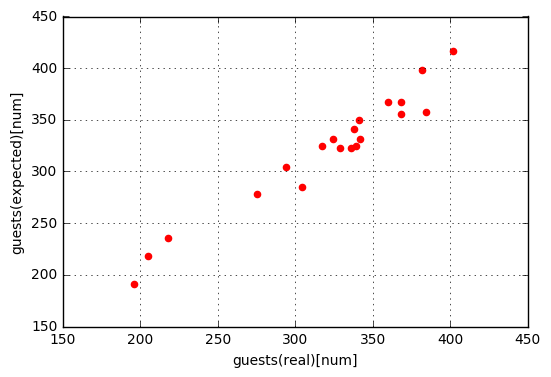

In [20]:
from IPython.core.display import display

df_1['prediction'] = (df_1.low_temp * a1) + (df_1.high_temp * a2) + b
df_1['diff'] = df_1.prediction - df_1.guests
display(df_1)
display(df_1.describe())


plt.xlabel('guests(real)[num]')
plt.ylabel('guests(expected)[num]')
plt.grid()
plt.scatter(df_1.guests,  df_1.prediction, marker="o", color="red")

## 6.5　重相関係数

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec5.html
- テーマ
   1. 重相関係数を求める
       - 公式が載っているが、関数で簡単に求められてしまうので、そちらで表示する

In [24]:
#df_1.corr().guests.prediction
corr_list_1 = stats.pearsonr(df_1.guests, df_1.prediction)
print('r_val = ', corr_list_1[0])
print('p_val = ', corr_list_1[1])

r_val =  0.975710876004
p_val =  2.55907240062e-13


## 6.6　通過テスト

- URL : http://kogolab.chillout.jp/elearn/icecream/chap6/sec6.html
- テーマ
   1. 重回帰モデルの復習
       - 重回帰モデル作成
       - 予測値算出
       - 重回帰係数算出

a1(score)  =  0.00693489095883
a2(ave) =  0.128120993303
b(Intercept)  =  -2.09411133494
guest = (score *  0.00693489095883 ) + (ave *  0.128120993303 ) +  -2.09411133494


,num,score,grade,ave,expected,diff
0,1,440,1.57,5.7,1.687530,0.117530
1,2,448,1.83,6.8,1.883943,0.053943
2,3,455,2.05,6.2,1.855614,-0.194386
3,4,460,1.14,5.5,1.800604,0.660604
4,5,473,2.73,6.0,1.954818,-0.775182
5,6,485,1.65,7.3,2.204594,0.554594
6,7,489,2.02,7.6,2.270770,0.250770
7,8,500,2.98,7.3,2.308617,-0.671383
8,9,512,1.79,5.6,2.174030,0.384030
9,10,518,2.63,7.6,2.471882,-0.158118


,num,score,grade,ave,expected,diff
count,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,10.000000,534.052632,2.511053,7.036842,2.511053,3.646206e-15
std,5.627314,71.911577,0.761562,0.920272,0.586385,4.859310e-01
min,1.000000,440.000000,1.140000,5.500000,1.687530,-7.751820e-01
25%,5.500000,479.000000,1.925000,6.350000,2.064424,-3.198141e-01
50%,10.000000,518.000000,2.630000,7.300000,2.400298,5.394257e-02
75%,14.500000,583.500000,3.085000,7.600000,2.913305,3.600347e-01
max,19.000000,690.000000,3.870000,8.800000,3.818428,6.984282e-01


r_val =  0.769977145914
p_val =  0.000115355967725


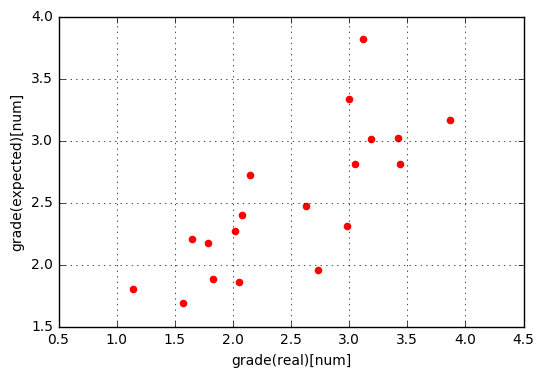

In [28]:
# csvからデータの読み込み
df_2 = pd.read_csv('./data/chapter6-6.csv')

# 目的変数と説明変数の設定
y = df_2.grade
x1 = df_2.score
x2 = df_2.ave

obj = np.array(y)        # 目的変数
exp = np.array([x1, x2]) # 説明変数

# 偏回帰係数の計算
b_2, a1_2, a2_2 = stat(obj, exp)

# 求めた偏回帰係数
print("a1(score)  = ", a1_2)
print("a2(ave) = ", a2_2)
print("b(Intercept)  = ", b_2)

# 上記の値を重回帰モデルに当てはめて、式を作成する
print("guest = (score * ", a1, ") + (ave * ", a2, ") + ", b)

# 予測値の算出
df_2['expected'] = (df_2.score * a1_2) + (df_2.ave * a2_2) + b_2
df_2['diff'] = df_2.expected - df_2.grade
display(df_2)
display(df_2.describe())

# 散布図作成
plt.xlabel('grade(real)[num]')
plt.ylabel('grade(expected)[num]')
plt.grid()
plt.scatter(df_2.grade,  df_2.expected, marker="o", color="red")

# 重相関係数算出
corr_list_2 = stats.pearsonr(df_2.grade, df_2.expected)
print('r_val = ', corr_list_2[0])
print('p_val = ', corr_list_2[1])